# Method Comparisons

This section directly compares between the different methods, using simulated data. 

## Overview

Comparisons between methods are organized into the following groups:
- Exponent Comparisons
    - Compare measures that directly estimate the aperiodic exponent
    - Methods: specparam & IRASA
- Compare between exponent and time domain methods
    - Compare measures that estimate aperiodic exponent to other measures
    - Methods: compare specparam to fluctuation, complexity, and information measures 
- Compare within time domain methods
    - Compare non-exponent measures to each other
    - Methods: compare fluctuation, complexity, and information measures to each other

## Code Approach

Here, we will briefly introduce the general strategy and code used to run the simulations. 

### run_comparisons

The overarching function used to run simulation comparisons in this section is `run_comparisons`.

This approach allows for:
- defining a procedure to simulate time series
- defining a set of measures to apply to the simulated time series
- applying the set of measures across simulated instances, sampling from parameter ranges

In [1]:
# Import the `run_comparisons` function from the custom code folder
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))
from apm.run import run_comparisons

In [2]:
# Check the documentation for `run_comparisons`
print(run_comparisons.__doc__)

Compute multiple measures of interest across the same set of simulations.

    Parameters
    ----------
    sim_func : callable
        A function to create simulated time series.
    sim_params : dict
        Input arguments for `sim_func`.
    measures : dict
        A measure function to apply to the simulated data.
        The keys should be functions to apply to the data.
        The values should be a dictionary of parameters to use for the method.
    samplers : dict
        Information for how to sample across parameters for the simulations.
        The keys should be string labels of which parameter to update.
        The values should be data ranges to sample for that parameter.
    n_sims : int
        The number of simulations to run.
    verbose : bool, optional, default: False
        Whether to print out simulation parameters.
        Used for checking simulations / debugging.

    Returns
    -------
    outs : dict
        Computed results for each measure across the 

Next, we can run an example of using `run_comparisons`.

To do so, we will define an example analysis to apply some measures of interest (here, computing the mean and the variance) across samples of simulations of powerlaw data.

In [3]:
import numpy as np
from neurodsp.sim import sim_powerlaw

from apm.sim.settings import SIM_PARAMS_AP
from apm.utils import sampler

In [4]:
# Define the measures to apply to the simulated signals
measures = {np.var : {}, np.mean : {}}

# Define how to sample across parameters, and what ranges to use
samplers = {'update_exp' : sampler(np.arange(-2.5, 0, 0.1))}

In [5]:
# Run comparisons across samples of aperiodic noise
out = run_comparisons(sim_powerlaw, SIM_PARAMS_AP, measures,
                      samplers, n_sims=5, verbose=True)

{'n_seconds': 30, 'fs': 1000, 'f_range': (0.5, None), 'exponent': -0.29999999999999805}
{'n_seconds': 30, 'fs': 1000, 'f_range': (0.5, None), 'exponent': -2.1999999999999997}
{'n_seconds': 30, 'fs': 1000, 'f_range': (0.5, None), 'exponent': -1.299999999999999}
{'n_seconds': 30, 'fs': 1000, 'f_range': (0.5, None), 'exponent': -1.4999999999999991}
{'n_seconds': 30, 'fs': 1000, 'f_range': (0.5, None), 'exponent': -0.9999999999999987}


In [6]:
# Check output values of computed measures
out

{'var': array([1., 1., 1., 1., 1.]),
 'mean': array([ 9.05941988e-18,  2.84217094e-17,  1.89478063e-17, -1.13686838e-17,
         3.07901852e-17])}

### Evaluating Results

After computing the measures, we can examine the results, comparing between different measurements.

In [7]:
# Import a plot function to visualize the computed measures
from apm.plts import plot_dots

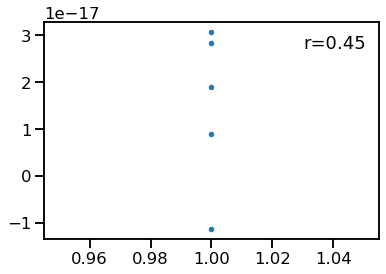

In [8]:
# Plot the computed measures against each other
plot_dots(out['var'], out['mean'])